Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

Answer:

K-Means Clustering:

Partition-based algorithm that divides data into k clusters by minimizing intra-cluster variance.

Requires pre-specifying the number of clusters (k).

Computationally efficient for large datasets.

Use case: Market segmentation where you want to group customers into k segments (e.g., “budget shoppers,” “premium buyers,” etc.).

Hierarchical Clustering:

Builds a tree-like structure (dendrogram) by merging (agglomerative) or splitting (divisive) clusters.

Does not require specifying k in advance (can be chosen by cutting the dendrogram).

More interpretable but computationally expensive for large datasets.

Use case: Document clustering where hierarchy matters (e.g., grouping research papers into subjects → subfields → specific topics).

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Answer:

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters.

Formula (simplified):

𝑆
=
𝑏
−
𝑎
max
⁡
(
𝑎
,
𝑏
)
S=
max(a,b)
b−a
	​


where:

a = average distance to points in the same cluster

b = average distance to the nearest different cluster

Score range:

+1 → well-clustered

0 → overlapping clusters

-1 → misclassified points

Purpose: To evaluate the quality of clustering and compare performance across algorithms or different values of k.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer:

eps (ε): The maximum distance between two samples to be considered neighbors.

Small eps → many points marked as noise.

Large eps → fewer clusters, possibly merging them.

min_samples: The minimum number of points required to form a dense region.

Small min_samples → more clusters, even with fewer points.

Large min_samples → stricter density requirement, fewer clusters.

Together, eps and min_samples define dense regions → clusters, while sparse regions are treated as noise/outliers.

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer:

Both K-Means and DBSCAN use distance metrics (e.g., Euclidean distance) to group data points.

Features with larger numerical ranges dominate distance calculations.

Scaling (StandardScaler / MinMaxScaler):

Brings all features to comparable ranges.

Ensures fair weight for each feature.

Without scaling, clusters may be biased toward certain features.

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Answer:

The Elbow Method helps find the optimal number of clusters (k).

Steps:

Run K-Means for a range of k values.

Compute the Within-Cluster Sum of Squares (WCSS) for each k.

Plot k vs. WCSS.

The “elbow point” (sharp bend) indicates where adding more clusters does not significantly reduce WCSS.

This balances clustering accuracy vs. complexity.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

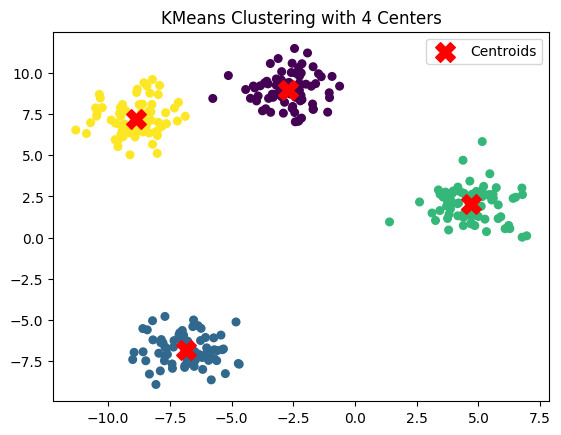

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label="Centroids")
plt.title("KMeans Clustering with 4 Centers")
plt.legend()
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=6)
labels = dbscan.fit_predict(X)

# Count clusters (excluding noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", n_clusters)


Number of clusters found: 6


Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

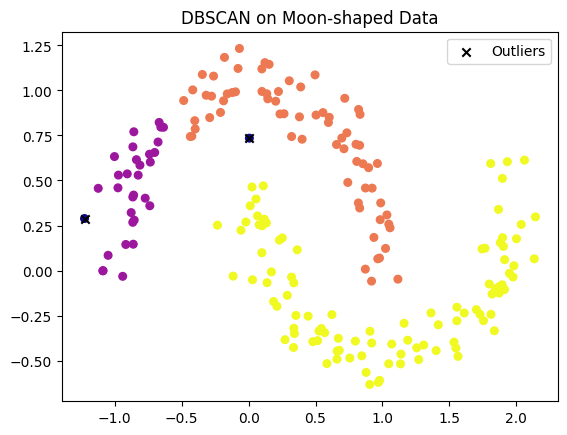

In [3]:
from sklearn.datasets import make_moons

# Generate moons data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot with outliers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=30)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c='black', marker='x', label="Outliers")
plt.title("DBSCAN on Moon-shaped Data")
plt.legend()
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

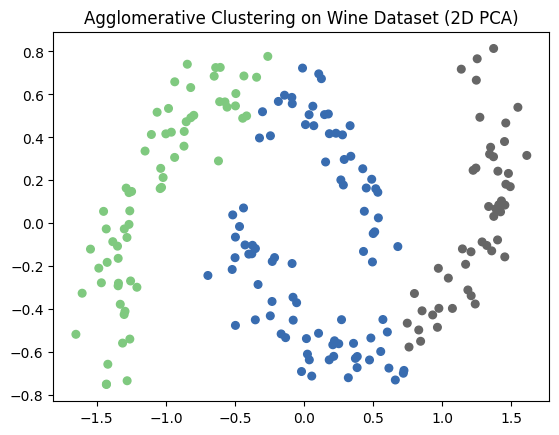

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# PCA to 2D
pca = PCA(n_components=2)
wine_2d = pca.fit_transform(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(wine_2d)

# Visualization
plt.scatter(wine_2d[:, 0], wine_2d[:, 1], c=labels, cmap='Accent', s=30)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?


Answer:

Clustering Algorithm Choice:

Start with K-Means for quick segmentation (scalable).

Use DBSCAN if outliers/noise (e.g., unusual shoppers) are important.

Try Hierarchical clustering for interpretability.

Data Preprocessing:

Handle missing values (imputation).

Standardize/normalize features (purchase frequency, spend, demographics).

Encode categorical variables (e.g., gender, location).

Determining Number of Clusters:

Elbow method (for K-Means).

Silhouette Score to compare quality.

Marketing Benefits:

Personalized promotions (e.g., discount for frequent buyers, loyalty offers).

Product recommendations tailored to cluster preferences.

Customer retention by identifying “at-risk” customers.

Efficient allocation of marketing budget.